# Practica 3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [13]:
# Dataset obetenido de https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center
path='transfusion.data'
all_variables=['Recency','Frecuency','Monetary','Time(Months)','target']
features=['Recency','Frecuency','Monetary','Time(Months)']
target=['target']
df= pd.read_csv(path,names=all_variables)
df.head()

,Recency,Frecuency,Monetary,Time(Months),target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df[features]),columns=features)
df_sc.head()

,Recency,Frecuency,Monetary,Time(Months)
0,0.027027,1.000000,1.000000,1.000000
1,0.000000,0.244898,0.244898,0.270833
2,0.013514,0.306122,0.306122,0.343750
3,0.027027,0.387755,0.387755,0.447917
4,0.013514,0.469388,0.469388,0.781250


In [16]:
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df[features]),columns=features)
df_pca.head()

,Recency,Frecuency,Monetary,Time(Months)
0,11121.464798,-52.671698,13.369760,-1.023712e-14
1,1871.175354,-27.063127,-2.829198,1.226789e-13
2,2621.212016,-27.687038,-0.927556,-1.008442e-15
3,3621.268306,-27.922435,1.161082,-4.178197e-16
4,4621.559899,-6.868533,-2.641834,-1.118224e-15


In [17]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.99803934e-01, 1.70992586e-04, 2.50734667e-05, 9.77550847e-36])

In [18]:
df_pca['target'] = df[target]
df_pca.columns = ['PC1', 'PC2','PC3','PC4','target']
df_pca.head()

,PC1,PC2,PC3,PC4,target
0,11121.464798,-52.671698,13.369760,-1.023712e-14,1
1,1871.175354,-27.063127,-2.829198,1.226789e-13,1
2,2621.212016,-27.687038,-0.927556,-1.008442e-15,1
3,3621.268306,-27.922435,1.161082,-4.178197e-16,1
4,4621.559899,-6.868533,-2.641834,-1.118224e-15,0


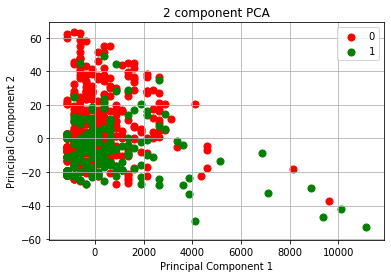

In [25]:

fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = [0, 1]
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = df_pca['target'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'PC1']
    , df_pca.loc[indicesToKeep, 'PC2']
    , c = color
    , s = 50)
ax.legend(targets)
ax.grid()

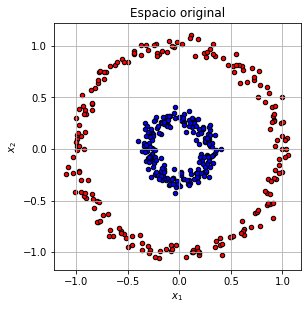

In [22]:
np.random.seed(0)
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Espacio original")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid()

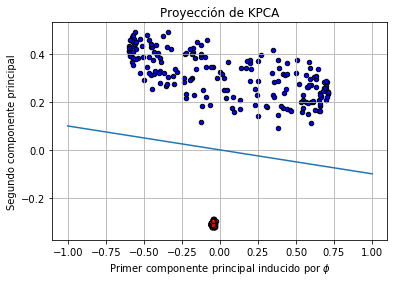

In [26]:
kpca = KernelPCA(kernel = "rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X)

plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",s=20, edgecolor='k')
x = np.linspace(-1, 1, 1000)
plt.plot(x, -0.1*x, linestyle="solid")
plt.title("Proyección de KPCA")
plt.xlabel("Primer componente principal inducido por $\phi$")
plt.ylabel("Segundo componente principal")
plt.grid()